In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mastercard import dist_visualisation, dist_categorical_visualisation

2025-06-08 10:01:08.934 | INFO     | mastercard.config:<module>:11 - PROJ_ROOT path is: C:\Users\mateu\projects\mastercard_challenge


In [2]:
PROCESSED_DATA = Path("../data/processed/")
FIGURES_DATA = Path("../reports/figures/")

In [3]:
df = pd.read_parquet(PROCESSED_DATA / "users.parquet")

In [4]:
print("Initial shape", df.shape)

Initial shape (20000, 10)


In [5]:
df.columns

Index(['user_id', 'age', 'sex', 'education', 'primary_source_of_income',
       'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'country',
       'signup_date', 'risk_score'],
      dtype='object')

In [6]:
df.head()

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
0,U00001,56,Other,High School,Employment,477.69,243.18,Finland,2021-04-01,0.571079
1,U00002,36,Female,Bachelor,Business,31.60,737.76,France,2020-07-07,0.705268
2,U00003,70,Other,High School,Student Aid,275.72,1477.50,Finland,2022-08-23,0.429579
3,U00004,38,Other,High School,Savings,288.29,1135.03,Belgium,2022-05-21,0.581384
4,U00005,61,Male,High School,Employment,7.00,892.76,Italy,2022-03-15,0.420227


In [7]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [8]:
df['signup_date']

0       2021-04-01
1       2020-07-07
2       2022-08-23
3       2022-05-21
4       2022-03-15
           ...    
19995   2020-07-20
19996   2022-07-19
19997   2022-05-31
19998   2024-11-27
19999   2022-08-26
Name: signup_date, Length: 20000, dtype: datetime64[ns]

In [9]:
missing = df.isna().sum()
print("Explicit missing values: \n", missing[missing > 0])

Explicit missing values: 
 education    3862
dtype: int64


## Categorical data

In [10]:
categorical_cols = ["sex", "education", "primary_source_of_income", "country"]

In [11]:
df['education'].value_counts()

education
PhD            4162
Master         4019
Bachelor       4011
High School    3946
Name: count, dtype: int64

In [19]:
df['education'] = df['education'].fillna("Missing")

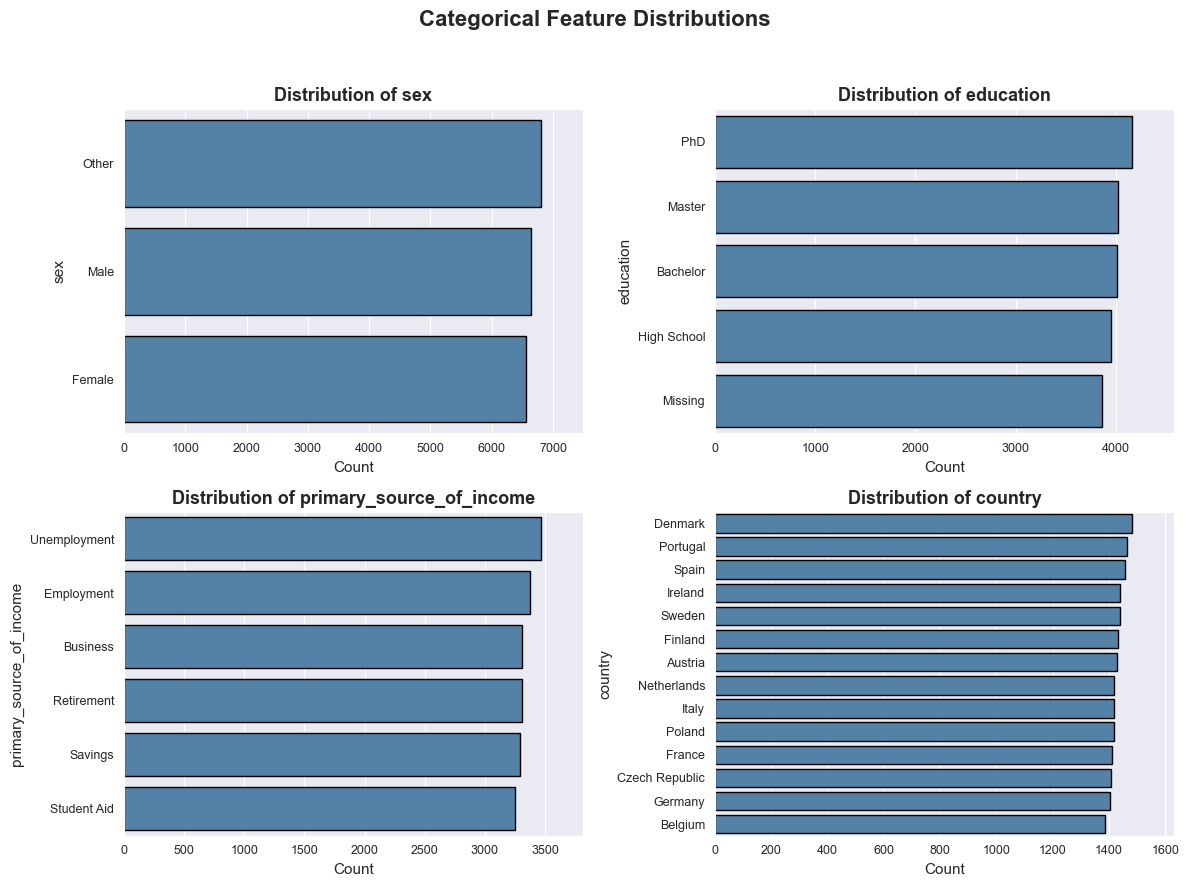

(<Figure size 1200x900 with 4 Axes>,
 array([<Axes: title={'center': 'Distribution of sex'}, xlabel='Count', ylabel='sex'>,
        <Axes: title={'center': 'Distribution of education'}, xlabel='Count', ylabel='education'>,
        <Axes: title={'center': 'Distribution of primary_source_of_income'}, xlabel='Count', ylabel='primary_source_of_income'>,
        <Axes: title={'center': 'Distribution of country'}, xlabel='Count', ylabel='country'>],
       dtype=object))

In [21]:
dist_categorical_visualisation(df, categorical_cols)

## Numerical_cols

In [14]:
numerical_cols = df.select_dtypes(["number"])

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,20000.0,45.9733,18.0,32.0,46.0,60.0,74.0,16.520649
sum_of_monthly_installments,20000.0,301.669748,0.01,87.7675,207.65,418.2725,3165.7,304.160334
sum_of_monthly_expenses,20000.0,1184.221874,0.04,353.655,824.885,1651.9875,10994.33,1172.054772
signup_date,20000,2022-10-07 04:32:22.560000256,2020-04-21 00:00:00,2021-07-09 00:00:00,2022-10-08 00:00:00,2024-01-02 00:00:00,2025-03-22 00:00:00,NaN
risk_score,20000.0,0.501277,0.0,0.39848,0.500119,0.603234,1.0,0.149876


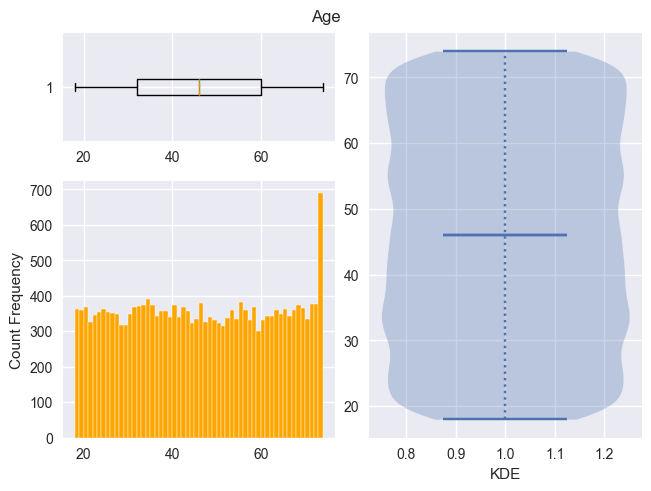

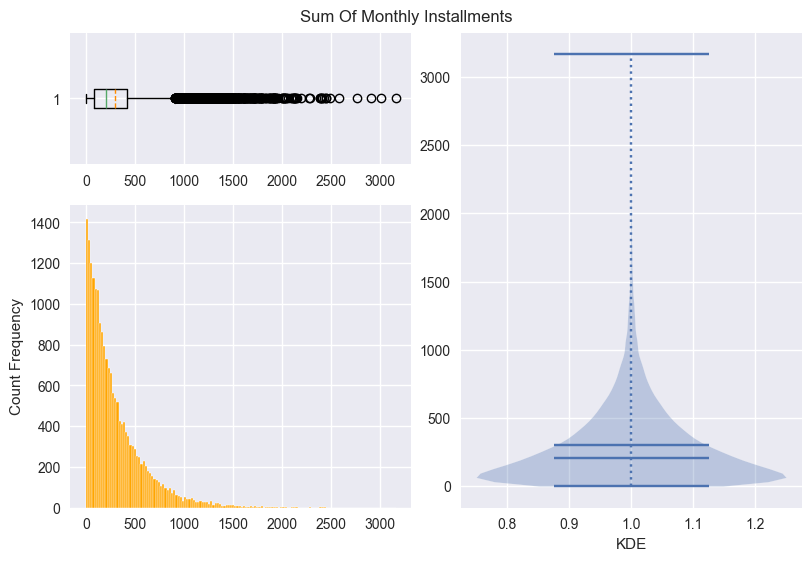

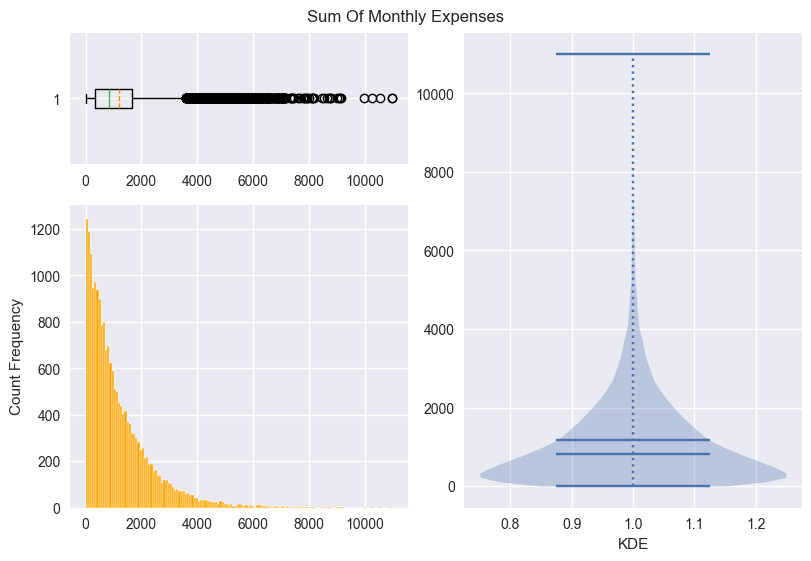

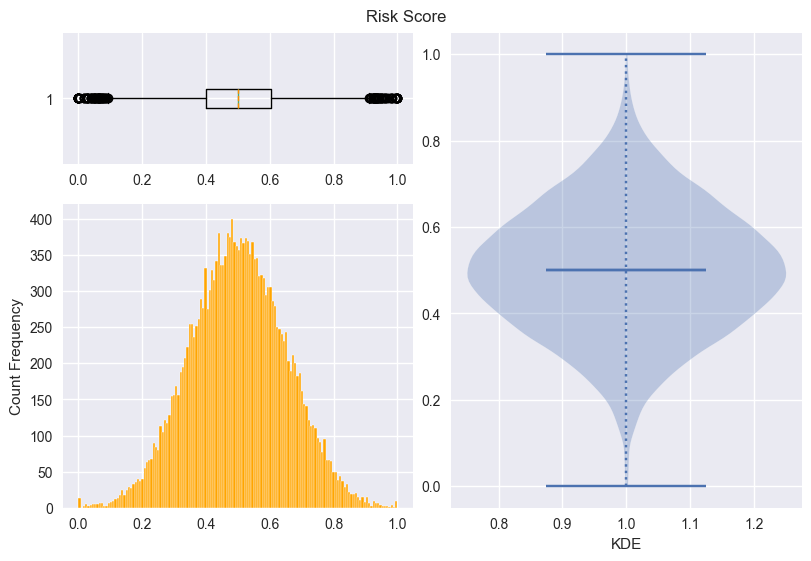

In [16]:
for col in numerical_cols:
	dist_visualisation(df[col], col.title().replace("_", " "))

In [17]:
corr = numerical_cols.corr()

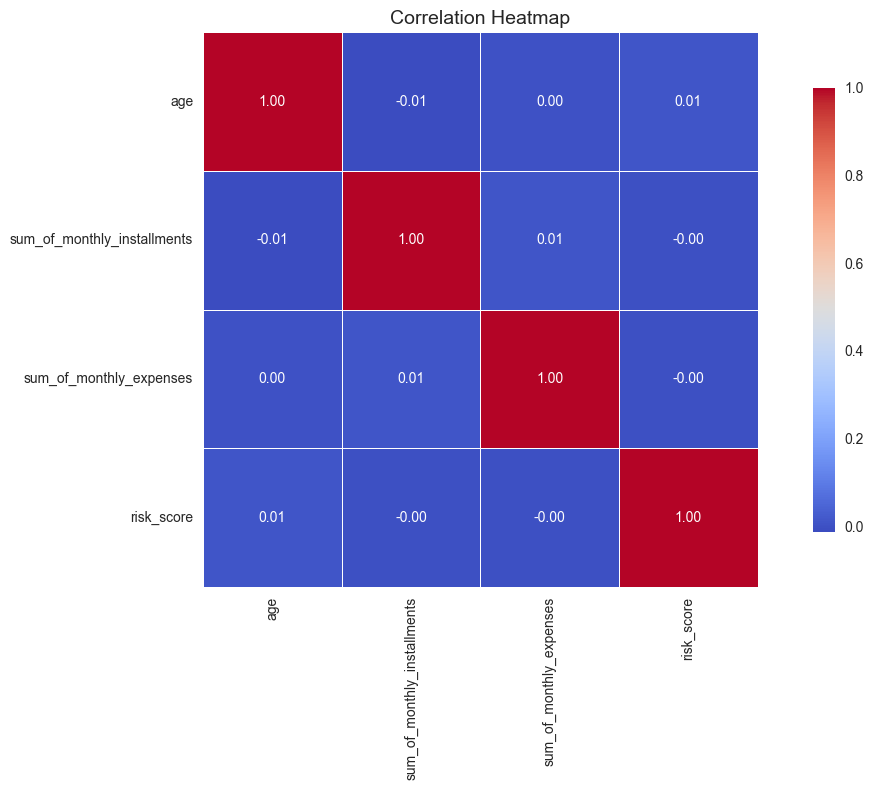

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr,
			ax=ax,
			annot=True,
			fmt='.2f',
			square=True,
			linewidths=.5,
			cbar_kws={"shrink": 0.8},
			cmap="coolwarm"
			)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()